In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
MSFT = pd.read_csv("/content/drive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")

In [5]:
MSFT.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-22,64.120003,65.139999,64.120003,65.029999,60.704510,20680000
1,2017-03-23,64.940002,65.239998,64.769997,64.870003,60.555168,19269200
2,2017-03-24,65.360001,65.449997,64.760002,64.980003,60.657841,22617100
3,2017-03-27,64.629997,65.220001,64.349998,65.099998,60.769852,18614700
4,2017-03-28,64.959999,65.470001,64.650002,65.290001,60.947208,20080400
5,2017-03-29,65.120003,65.500000,64.949997,65.470001,61.115242,13618400
6,2017-03-30,65.419998,65.980003,65.360001,65.709999,61.339275,15122800
7,2017-03-31,65.650002,66.190002,65.449997,65.860001,61.479309,21040300
8,2017-04-03,65.809998,65.940002,65.190002,65.550003,61.189915,20400900
9,2017-04-04,65.389999,65.809998,65.279999,65.730003,61.357964,12997400


In [6]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [7]:
MSFT_NEW=MSFT.dropna(axis=0)
MSFT_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-22,64.120003,65.139999,64.120003,65.029999,60.704510,20680000
1,2017-03-23,64.940002,65.239998,64.769997,64.870003,60.555168,19269200
2,2017-03-24,65.360001,65.449997,64.760002,64.980003,60.657841,22617100
3,2017-03-27,64.629997,65.220001,64.349998,65.099998,60.769852,18614700
4,2017-03-28,64.959999,65.470001,64.650002,65.290001,60.947208,20080400
...,...,...,...,...,...,...,...
1254,2022-03-15,280.350006,287.820007,278.730011,287.149994,287.149994,34245100
1255,2022-03-16,289.109985,294.570007,283.200012,294.390015,294.390015,37826300
1256,2022-03-17,293.290009,295.609985,289.369995,295.220001,295.220001,30816600
1257,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000


In [8]:
MSFT_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [9]:
MSFT_NEW['Close']=pd.to_numeric(MSFT_NEW.Close,errors='coerce')
MSFT_NEW = MSFT_NEW.dropna()
MSFT_TRAIN = MSFT_NEW.iloc[:,4:5].values

In [10]:
MSFT_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [11]:
sc = MinMaxScaler(feature_range=(0,1))
MSFT_TRAIN = sc.fit_transform(MSFT_TRAIN)
MSFT_TRAIN.shape

(1259, 1)

In [12]:
x_train = []
y_train = []

for i in range (60,1227):
  x_train.append(MSFT_TRAIN[i-60:i,0])
  y_train.append(MSFT_TRAIN[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1167, 60, 1)

In [14]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
37/37 - 16s - loss: 0.0150 - 16s/epoch - 426ms/step
Epoch 2/20
37/37 - 7s - loss: 0.0029 - 7s/epoch - 195ms/step
Epoch 3/20
37/37 - 7s - loss: 0.0022 - 7s/epoch - 199ms/step
Epoch 4/20
37/37 - 7s - loss: 0.0025 - 7s/epoch - 192ms/step
Epoch 5/20
37/37 - 7s - loss: 0.0035 - 7s/epoch - 196ms/step
Epoch 6/20
37/37 - 7s - loss: 0.0020 - 7s/epoch - 194ms/step
Epoch 7/20
37/37 - 7s - loss: 0.0020 - 7s/epoch - 201ms/step
Epoch 8/20
37/37 - 7s - loss: 0.0017 - 7s/epoch - 195ms/step
Epoch 9/20
37/37 - 8s - loss: 0.0021 - 8s/epoch - 209ms/step
Epoch 10/20
37/37 - 8s - loss: 0.0025 - 8s/epoch - 203ms/step
Epoch 11/20
37/37 - 7s - loss: 0.0017 - 7s/epoch - 201ms/step
Epoch 12/20
37/37 - 7s - loss: 0.0020 - 7s/epoch - 196ms/step
Epoch 13/20
37/37 - 7s - loss: 0.0016 - 7s/epoch - 203ms/step
Epoch 14/20
37/37 - 9s - loss: 0.0024 - 9s/epoch - 240ms/step
Epoch 15/20
37/37 - 8s - loss: 0.0020 - 8s/epoch - 206ms/step
Epoch 16/20
37/37 - 7s - loss: 0.0019 - 7s/epoch - 200ms/step
Epoch 17/20
37/

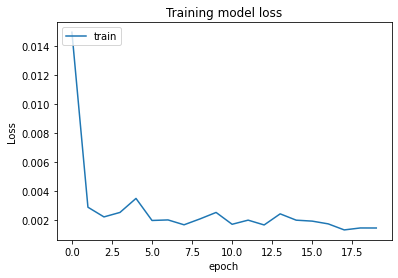

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [17]:
MSFT_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
MSFT_TEST = pd.read_csv("/content/drive/MyDrive/DS 340W/Final Research Paper/Datasets/MSFT_5Y.csv")
MSFT_TEST["Close"]=pd.to_numeric(MSFT_TEST.Close, errors='coerce')
MSFT_TEST = MSFT_TEST.dropna()
MSFT_TEST = MSFT_TEST.iloc[:,4:5]
y_test = MSFT_TEST.iloc[60:,0:].values

inputClosing = MSFT_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(MSFT_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1199, 60, 1)

In [19]:
y_predict = model.predict(x_test)
y_predict

array([[0.02785837],
       [0.02783712],
       [0.02765567],
       ...,
       [0.7586801 ],
       [0.756587  ],
       [0.7561466 ]], dtype=float32)

In [20]:
predicted_price = sc.inverse_transform(y_predict)

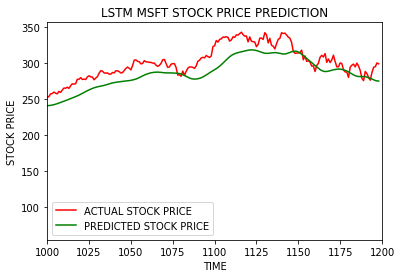

In [21]:
plt.plot(y_test, color='red', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='green', label='PREDICTED STOCK PRICE')
plt.title('LSTM MSFT STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.xlim([1000, 1200])
plt.show()

In [22]:
from sklearn import metrics